# Exercise 1

## Bank Marketing Data Set

Use the bank direct marketing dataset (bank.csv) to train a logistic regression (sklearn) predicting if a client will subscribe (1/0) to a term deposit (variable called ‘y’).

Use a train and test setup and use k-fold cross-validation to choose between L1- and L2-penalty or no penalty (read the documentation of sklearn.linear_model.LogisticRegression, you will have to specify ‘penalty’ and ‘C’). Hint: Use class_weight = ‘balanced’, as the dataset is unbalanced also use Pipeline.

Once you have chosen the best model (best test score), plot the ROC curve as well as precision and recall with varying thresholds (use the precision_recall_curve function from sklearn).

Source: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from typing import Dict, Tuple, Callable
from sklearn import svm
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [7]:
data = pd.read_csv('banking.csv')
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


Hot encode the data since we have categorical variables

In [8]:
cat_columns = ["job", "marital","education","housing","loan","contact","month","day_of_week","poutcome","default"]

In [9]:
data_processed = pd.get_dummies(data, prefix_sep="__",
                              columns=cat_columns)

In [10]:
data_processed

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,day_of_week__mon,day_of_week__thu,day_of_week__tue,day_of_week__wed,poutcome__failure,poutcome__nonexistent,poutcome__success,default__no,default__unknown,default__yes
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,1,0,0,0,1,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,0,0,0,0,1,0,1,0,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,1,0,0,0,0,1,1,0,0
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,0,0,0,1,0,1,0,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,222,1,999,0,1.4,94.465,-41.8,4.866,5228.1,...,0,1,0,0,0,1,0,0,1,0
41184,31,196,2,999,0,1.1,93.994,-36.4,4.860,5191.0,...,0,1,0,0,0,1,0,0,1,0
41185,42,62,3,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,1,0,0,1,0
41186,48,200,2,999,0,-3.4,92.431,-26.9,0.742,5017.5,...,0,0,1,0,0,1,0,1,0,0


In [56]:
data['pdays'].unique()

array([999,   6,   3,   2,   4,  16,   0,   5,  11,  14,  13,   9,  15,
        17,  12,  26,   7,  19,  10,   1,  18,   8,  20,  21,  22,  25,
        27])

In [57]:
data['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

In [12]:
data_processed

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,day_of_week__mon,day_of_week__thu,day_of_week__tue,day_of_week__wed,poutcome__failure,poutcome__nonexistent,poutcome__success,default__no,default__unknown,default__yes
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,1,0,0,0,1,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,0,0,0,0,1,0,1,0,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,1,0,0,0,0,1,1,0,0
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,0,0,0,1,0,1,0,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,222,1,999,0,1.4,94.465,-41.8,4.866,5228.1,...,0,1,0,0,0,1,0,0,1,0
41184,31,196,2,999,0,1.1,93.994,-36.4,4.860,5191.0,...,0,1,0,0,0,1,0,0,1,0
41185,42,62,3,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,1,0,0,1,0
41186,48,200,2,999,0,-3.4,92.431,-26.9,0.742,5017.5,...,0,0,1,0,0,1,0,1,0,0


In [13]:
#now let's seperate the pdays

In [14]:
cat_columns = ["pdays"]
data_processed = pd.get_dummies(data_processed, prefix_sep="__",
                              columns=cat_columns)

In [15]:
X = data_processed.loc[:, data_processed.columns != 'y']

In [16]:
y = data_processed.iloc[:, 9:10].values

In [17]:
X.columns

Index(['age', 'duration', 'campaign', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'job__admin.', 'job__blue-collar', 'job__entrepreneur',
       'job__housemaid', 'job__management', 'job__retired',
       'job__self-employed', 'job__services', 'job__student',
       'job__technician', 'job__unemployed', 'job__unknown',
       'marital__divorced', 'marital__married', 'marital__single',
       'marital__unknown', 'education__basic.4y', 'education__basic.6y',
       'education__basic.9y', 'education__high.school',
       'education__illiterate', 'education__professional.course',
       'education__university.degree', 'education__unknown', 'housing__no',
       'housing__unknown', 'housing__yes', 'loan__no', 'loan__unknown',
       'loan__yes', 'contact__cellular', 'contact__telephone', 'month__apr',
       'month__aug', 'month__dec', 'month__jul', 'month__jun', 'month__mar',
       'month__may', 'month__nov', 'month__oct', 'mont

In [18]:

X.head()

,age,duration,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job__admin.,...,pdays__17,pdays__18,pdays__19,pdays__20,pdays__21,pdays__22,pdays__25,pdays__26,pdays__27,pdays__999
0,44,210,1,0,1.4,93.444,-36.1,4.963,5228.1,0,...,0,0,0,0,0,0,0,0,0,1
1,53,138,1,0,-0.1,93.200,-42.0,4.021,5195.8,0,...,0,0,0,0,0,0,0,0,0,1
2,28,339,3,2,-1.7,94.055,-39.8,0.729,4991.6,0,...,0,0,0,0,0,0,0,0,0,0
3,39,185,2,0,-1.8,93.075,-47.1,1.405,5099.1,0,...,0,0,0,0,0,0,0,0,0,1
4,55,137,1,1,-2.9,92.201,-31.4,0.869,5076.2,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# create training and testing data sets which we will use later after we select a model from k-1 cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(32950, 89) (32950, 1)
(8238, 89) (8238, 1)


In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
#we will apply a scaler to our new data set, since some coefficients have high numbers relative to others which are
#logistical and have only a 1 or 0. Specifically, we will use the MinMax scaling option: (X-Xmin/Xmax - Xmin)
#
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Data exploration

In [30]:
data_processed['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

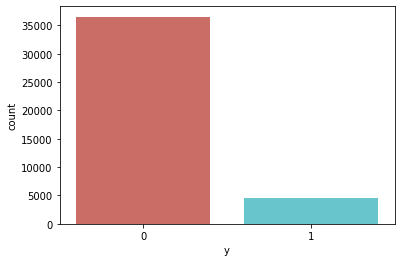

In [31]:

sns.countplot(x='y', data=data_processed, palette='hls')

In [32]:
count_no_sub = len(data[data['y']==0])
count_sub = len(data[data['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 88.73458288821988
percentage of subscription 11.265417111780131


### Fitting a logistic model with K-1 Cross Validation

In [33]:
# fit a logistic regression model then apply it within a k-1 cross validation set, split into 5 parts

lm = LogisticRegression(penalty='l1', solver='saga',class_weight = 'balanced',C=1.0)
cv_l1 = cross_val_score(estimator = lm, X=X_train, y=y_train.ravel(),cv=5)


In [34]:
#print the mean score to test it's working
cv_l1.mean()

0.8625495185342569

In [61]:
y_train.shape

(32950, 1)

### Applying the model in loops to test different 'C' values and different penalties (L1, L2)

In [51]:
#Copyright "Valeria for loop" 

#creating a loop for L1 penalty which records results in table
# we change the C paramter, which influences the effect that the penalty function has
c_param=[0.01, 0.1, 1, 10]
model_scores = pd.DataFrame(columns = ['C', 'Mean'])

model_scores['C'] = c_param 
for i in c_param:
    lm = LogisticRegression(penalty='l1', solver='liblinear',class_weight = 'balanced',C=i)
    cv_l1 = cross_val_score(estimator = lm, X=X_train, y=y_train.ravel(),cv=5)
    model_scores.loc[model_scores['C'] == i, "Mean"] = cv_l1.mean()
    
model_scores
    


,C,Mean
0,0.01,0.854082
1,0.10,0.860607
2,1.00,0.86261
3,10.00,0.862944


In [52]:
#creating a loop for L2 penalty which records results in table
# we change the C paramter, which influences the effect that the penalty function has
c_param=[0.01, 0.1, 1, 10]
model_scores = pd.DataFrame(columns = ['C', 'Mean'])

model_scores['C'] = c_param 
for i in c_param:
    lm = LogisticRegression(penalty='l2', solver='liblinear',class_weight = 'balanced',C=i)
    cv_l1 = cross_val_score(estimator = lm, X=X_train, y=y_train.ravel(),cv=5)
    model_scores.loc[model_scores['C'] == i, "Mean"] = cv_l1.mean()
    
model_scores

,C,Mean
0,0.01,0.839605
1,0.10,0.862064
2,1.00,0.862155
3,10.00,0.862914


### Applying our best model to the Train Data Set

In [53]:

logreg = LogisticRegression(penalty='l1', solver='liblinear',class_weight = 'balanced',C=10)
logreg.fit(X_train, y_train.ravel())

LogisticRegression(C=10, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
y_pred = logreg.predict_proba(X_test)

In [67]:

#average likelyhood that people subscribe
sub_chance = y_pred[:,1]
np.mean(sub_chance)



0.2650269363630083

In [65]:
y_pred[:,1]

array([0.06111006, 0.62532238, 0.15423571, ..., 0.47648503, 0.1301504 ,
       0.05732454])

In [315]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.86


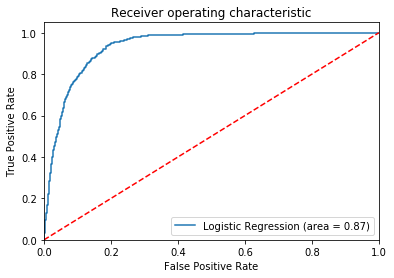

In [316]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()